# МОНТЕ-КАРЛО КАЗИНО РОЯЛЬ

Область тьмы: $(\frac{x}{a}+\frac{y}{b}+\frac{z}{c})^2<\frac{z}{p}$

Чтобы хоронить человека, нужно подобрать правильный гроб. Чтобы интегрировать функцию, нужно подобрать правильный прямоугольный параллелепипед. (интегрирование методом Монте-Карло смерти подобно).

Перейдем в полярную систему координат:

$(\frac{r \cos \phi \sin \theta}{a}+\frac{r \sin \phi \sin \theta}{b}+\frac{r \cos \theta}{c})^2<\frac{r \cos \theta}{p}$

Отсюда легко перейти к:

$r<\frac{1}{p\cos\theta(\frac{1}{a}\sin\phi\tan\theta+\frac{1}{b}\cos\phi\tan\theta+\frac{1}{c})^2}$

Чтобы дать оценку сверху на r, нам необходимо найти минимум знаменателя. 

Заметим, что т.к. по условию нам интересны лишь положительные x,y,z, то $\theta, \phi \in [0,\pi/2]$

Т.к. в этих пределах тангенс растет очень быстро вплоть до расходимости, очевидно, что минимум данной функции будет достигаться при $\theta = 0$. Таким образом, верна оценка $r<\frac{c^2}{p}$. Соответственно, эту величину мы и выберем в качестве стороны нашего функционального гробика для жителей гильбертова пространства.

In [1]:
import numpy as np

In [58]:
def casino (a, b, c, p, N):

    bound = c**2 / p

    xes = np.random.uniform(0 , bound , N)
    yes = np.random.uniform(0 , bound , N)
    zes = np.random.uniform(0 , bound , N)
    
    k = 0
    
    for i in range (N):
        
        if ( xes[i]/a + yes[i]/b + zes[i]/c )**2 - zes[i]/p < 0:
            
            k += 1
            
    V = ( bound**3 ) * k / N   
    
    return V

In [72]:
standart = [1,2,3,4] # изначально задача ставится на произвольные коэффициенты. Я возьму такие

casino (*standart, 1000000)


0.04143909375

<IPython.core.display.Javascript object>


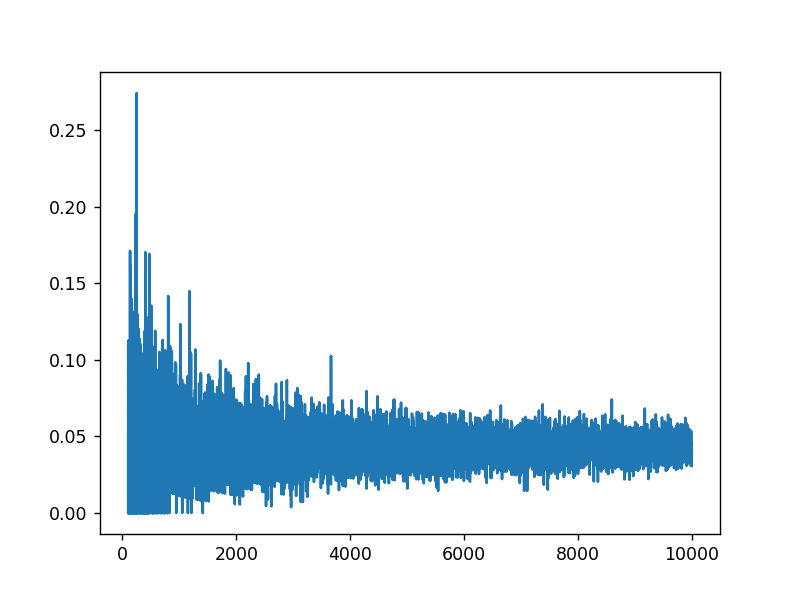

In [73]:
from matplotlib import pyplot as plt 
%matplotlib notebook

nes = [N for N in range (100, 10000)]
dots = [casino(*standart,N) for N in range (100, 10000)]

plt.plot(nes,dots) #картинка сходимости

Сходится не очень здорово, но на то он и метод Монте-Карло. Для больших N построить не получается ввиду того, что ЭВМ не переваривает таких вычислений.

Вспоним теперь старого доброго Соболя:

In [76]:
import sobol_seq
sobol_seq.i4_sobol_generate?

In [88]:
def sobol (a, b, c, p, N, seq = None):
    
    bound = c**2 / p
    
    if seq == None:
        
        sequence = sobol_seq.i4_sobol_generate(3, N)
    
    else:
        sequence = seq
    
    dots = bound * sequence # Соболь генерирует от 0 до 1. Умножением получаю нужный промежуток.
    
    xes, yes, zes = dots[:,0] , dots[:,1] , dots[:,2]
    
    k = 0
    
    for i in range (N):
        
        if ( xes[i]/a + yes[i]/b + zes[i]/c )**2 - zes[i]/p < 0:
            
            k += 1
            
    V = ( bound**3 ) * k / N   
    
    return V

In [86]:
sobol (*standart, 100000)

0.04294265625

Сейчас мы построим аналогичный график для метода Соболя. К сожалению, нельзя просто переписать тот же код, потому что генерируя последовательность Соболя на каждой итерации, ЭВМ не справляется с задачей. Поэтому мы сгенерируем её 1 раз, и дальше будем использовать всё больше и больше N. Это ни на что не повлияет, поскольку последовательность Соболя полностью детерминирована.

C:\Users\besag\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  """


<IPython.core.display.Javascript object>


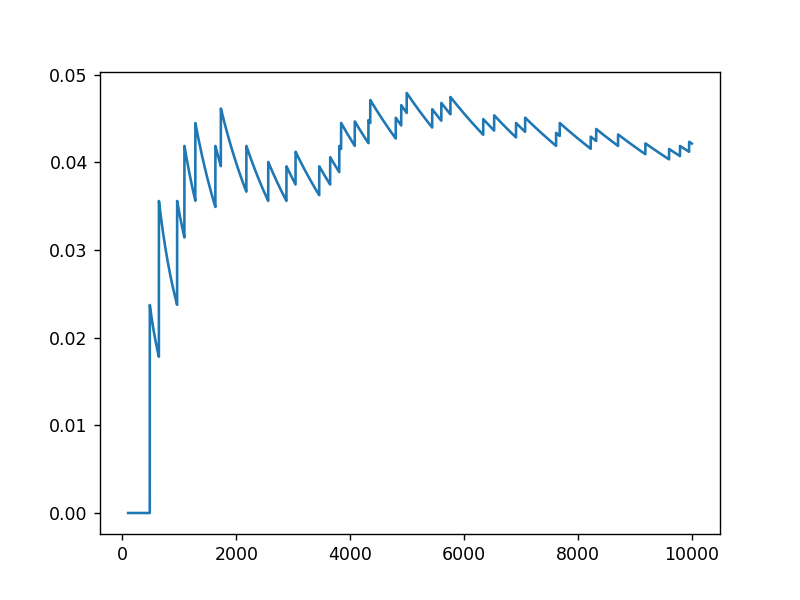

In [93]:
from matplotlib import pyplot as plt
%matplotlib notebook

sobseq = sobol_seq.i4_sobol_generate(3, 10000)

nes = [N for N in range (100, 10000)]
dots = [sobol(*standart, N , seq = sobseq) for N in range (100, 10000)]

plt.plot(nes,dots) 

Здесь картинка разительно отличается от того, что мы видели в случайном Монте-Карло. Видно, что флуктуации около истинного значения гораздо меньше для тех же N. Более того, к истинному значению последовательность Соболя приближается значительно быстрее. Напоследок сравним ответы этих методов для ста миллионов точек.

In [97]:
sobol(*standart, 100000000) # cчиталось это, на секундочку, 53 минуты

0.042195886875

In [96]:
casino(*standart, 100000000) # а это минут 10

0.042330751875